## Response to Assignment 5.1 : Oct 2025
### Submitted by: Sylvester Prasanna

Important: The sequence of the original assignment questions are retained in order for the response and evaluation.

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




## Data import and Analysis

In [3]:
data = pd.read_csv('/Users/sylvesterprasanna/Downloads/assignment5_1_starter/data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Adding a unique index to the datafram
data["ID"] = range(1, len(data) + 1)
data = data.set_index("ID")
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## Response to Q3:

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# create a new subset dataframe to remove unnecessary columns from the data
data_1 = data[["destination", "passanger", "temperature","time", "coupon","expiration","gender", "age", "maritalStatus", "has_children", "education", "occupation", "income"]]
data_1.head(10)
# data_1.info()
# data_1.isnull().sum()


,destination,passanger,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income
ID,,,,,,,,,,,,,
1,No Urgent Place,Alone,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
2,No Urgent Place,Friend(s),80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
3,No Urgent Place,Friend(s),80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
4,No Urgent Place,Friend(s),80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
5,No Urgent Place,Friend(s),80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
6,No Urgent Place,Friend(s),80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
7,No Urgent Place,Friend(s),55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
8,No Urgent Place,Kid(s),80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999
9,No Urgent Place,Kid(s),80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999


In [9]:
data_1[data_1['income'].isnull()]

,destination,passanger,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income
ID,,,,,,,,,,,,,


In [10]:
data_1["income"].unique()
data_1.dtypes
data_1.isnull().sum()
# data_1["age"] = data_1["age"].astype(str)
data_1["age"]
# data_1["Age_Group"] = np.where(data_1["age"] == 21, "Adult")
# data_1["Age_Group"]
# conditions = [
#     (data_1["age"] == "below21"),
#     (data_1["age"] == "21", "26", "31", "36", "41", "46"),
#     (data_1["age"] == "50plus")]

# choices = ["Young_Adult", "Adult", "Senior"]
# data_1["Category"] = np.select(conditions, choices)



ID
1        21
2        21
3        21
4        21
5        21
         ..
12680    26
12681    26
12682    26
12683    26
12684    26
Name: age, Length: 12684, dtype: object

## Response to Q4

4. What proportion of the total observations chose to accept the coupon?



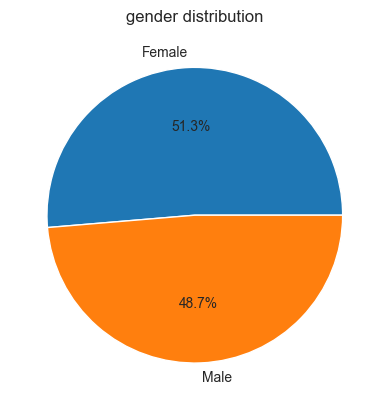

In [11]:
# Good to know : Not a response to Q4:

counts_1 = data_1["gender"].value_counts()
plt.pie(counts_1, labels=counts_1.index, autopct='%1.1f%%')
plt.title("gender distribution")
plt.show()

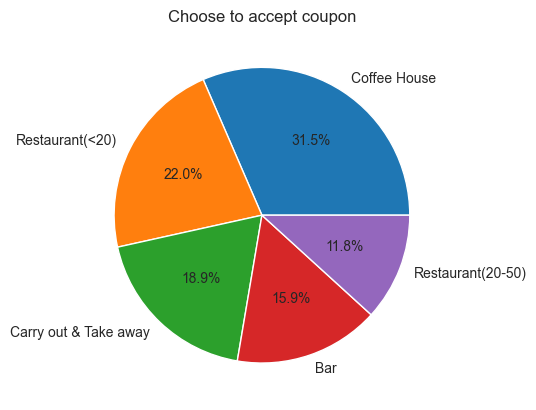

In [12]:
counts_2 = data_1["coupon"].value_counts()
plt.pie(counts_2, labels=counts_2.index, autopct='%1.1f%%')
plt.title("Choose to accept coupon")
plt.show()

In [13]:
coupon_offered = data_1["coupon"].value_counts()
print("The total coupon offered across different categories are:", coupon_offered)

coffee_coupon = data["CoffeeHouse"].isin(["4~8", "gt8", "less1", "1~3"]).value_counts()
print("The number of coupons accepted for Coffee are:" , coffee_coupon)

bar_coupon = data["Bar"].isin(["4~8", "gt8", "less1", "1~3"]).value_counts()
print("The number of coupons accepted for Bar are:", bar_coupon)

Restaurant_less_than_20 = data["RestaurantLessThan20"].isin(["4~8", "gt8", "less1", "1~3"]).value_counts()
print("The number of coupons accepted for cheap restaurants are:", Restaurant_less_than_20)

Carry_out_take_away = data["CarryAway"].isin(["4~8", "gt8", "less1", "1~3"]).value_counts()
print("The number of coupons accepted for take away are:" ,  Carry_out_take_away)

Restaurant20To50 = data["Restaurant20To50"].isin(["4~8", "gt8", "less1", "1~3"]).value_counts()
print("The number of coupons accepted for Restaurants above $20 and below $50 are:" , Restaurant20To50)


The total coupon offered across different categories are: coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
The number of coupons accepted for Coffee are: CoffeeHouse
True     9505
False    3179
Name: count, dtype: int64
The number of coupons accepted for Bar are: Bar
True     7380
False    5304
Name: count, dtype: int64
The number of coupons accepted for cheap restaurants are: RestaurantLessThan20
True     12334
False      350
Name: count, dtype: int64
The number of coupons accepted for take away are: CarryAway
True     12380
False      304
Name: count, dtype: int64
The number of coupons accepted for Restaurants above $20 and below $50 are: Restaurant20To50
True     10359
False     2325
Name: count, dtype: int64


In [14]:
coupons_offered_used = pd.DataFrame({'category':['Coffee House', 'Restaurant(less than 20)', 'Carry Out', 'Restaurant20To50', 'Bar'],
              'coupons_offered': [3996, 2786, 2393, 2017, 1492],
              'coupons_used': [9505, 12334, 12380, 10359,7380] })
coupons_offered_used.head()

,category,coupons_offered,coupons_used
0,Coffee House,3996,9505
1,Restaurant(less than 20),2786,12334
2,Carry Out,2393,12380
3,Restaurant20To50,2017,10359
4,Bar,1492,7380


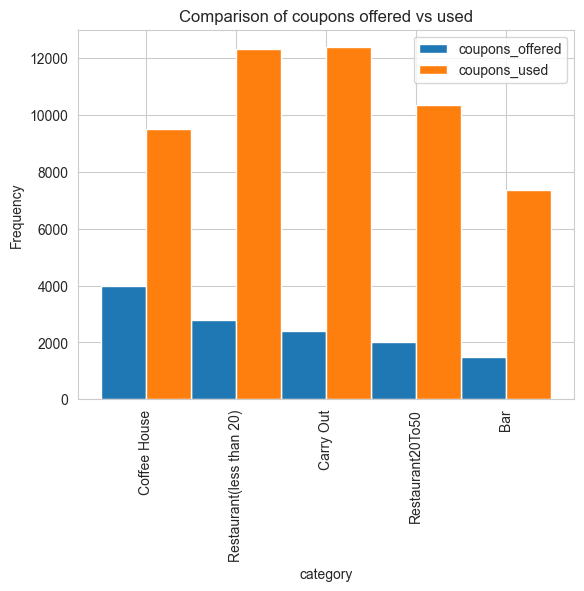

In [15]:
x = np.arange(len(coupons_offered_used))
width = 0.50

plt.bar(x - width/2, coupons_offered_used['coupons_offered'], width, label='coupons_offered')
plt.bar(x + width/2, coupons_offered_used['coupons_used'], width, label='coupons_used')
plt.xticks(x, coupons_offered_used['category'], rotation=90)


plt.xlabel('category')
plt.ylabel('Frequency')
plt.title('Comparison of coupons offered vs used')
plt.legend()
plt.show()

## Response to Q5

5. Use a bar plot to visualize the `coupon` column.

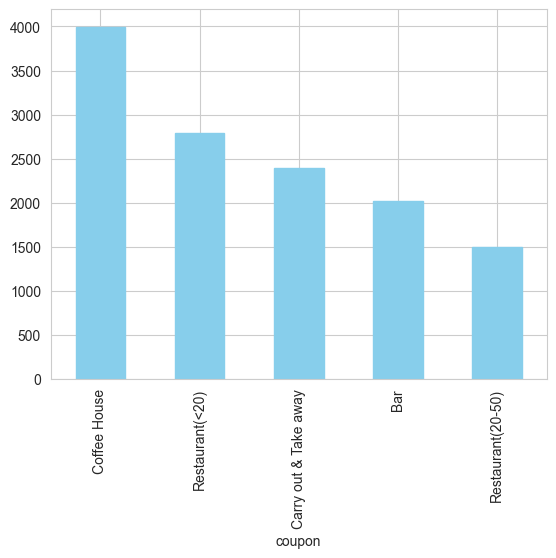

In [16]:
coupon_counts = data_1["coupon"].value_counts()
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='skyblue')
plt.show()


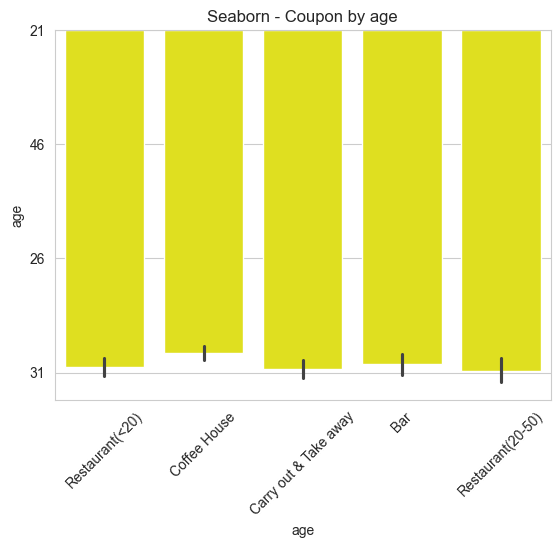

In [17]:
sns.barplot(x="coupon", y="age", data=data_1, color="yellow")
plt.title("MatPlot - Coupon by age")
plt.title("Seaborn - Coupon by age")
plt.xlabel("coupon")
plt.xlabel("age")
plt.xticks(rotation=45)
plt.show()

## Response to Q6:

6. Use a histogram to visualize the temperature column.

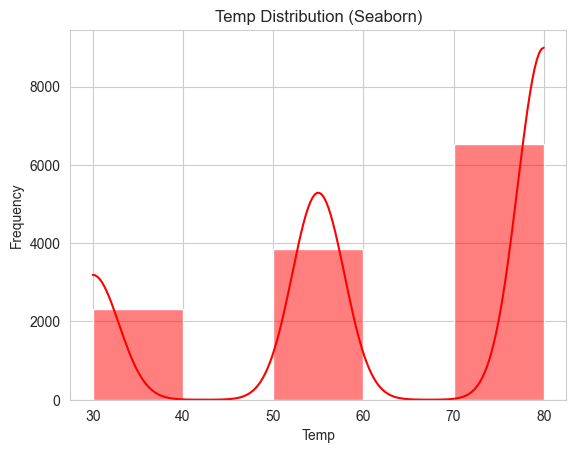

In [18]:
sns.histplot(data=data_1, x="temperature", bins=5, kde=True, color="red")
plt.title("Temp Distribution (Seaborn)")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.show()

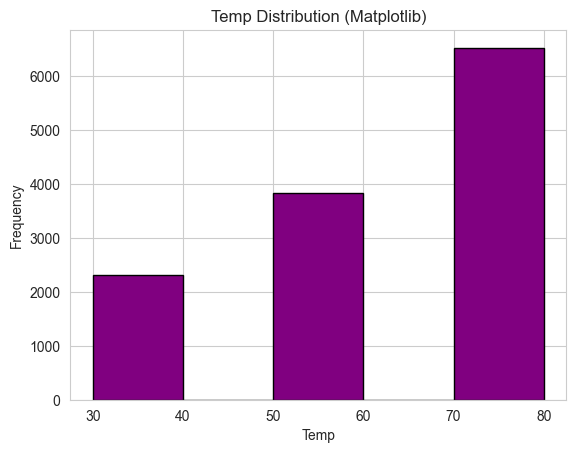

In [19]:
plt.hist(data_1["temperature"], bins=5, color="purple", edgecolor="black")
plt.title("Temp Distribution (Matplotlib)")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.show()

In [20]:
fig = px.histogram(data_1, x="temperature", nbins=5, title="Temp Distribution (Plotly)")
fig.show()

## Investigating the Bar Coupons

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
data_bar = data[data["coupon"] == "Bar"]
# data_bar.head()
data_bar["coupon"].value_counts()
data_bar["Bar"].value_counts()

Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [22]:
type(data_bar)


pandas.core.frame.DataFrame

In [23]:
data_bar.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 10 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1996 non-null   obj

2. What proportion of bar coupons were accepted?


In [37]:
data_bar["Bar"].unique()
data_bar["Bar"] = data_bar["Bar"].fillna("data_not_avbl")
data_bar = data_bar.replace({pd.NA: "data_not_avbl", None: "data_not_avbl"})
data_bar["Bar"].value_counts()

Bar
never            830
less1            570
1~3              397
4~8              150
gt8               49
data_not_avbl     21
Name: count, dtype: int64

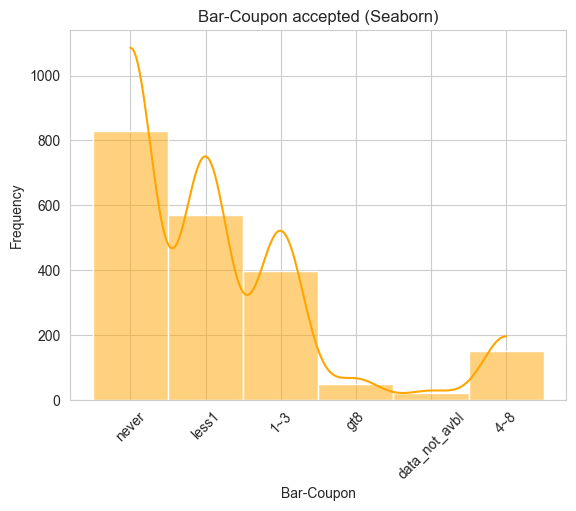

In [25]:
sns.histplot(data=data_bar, x="Bar", bins=5, kde=True, color="orange")
plt.title("Bar-Coupon accepted (Seaborn)")
plt.xlabel("Bar-Coupon")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Portion of Bar coupon that was accepted

sum = data_bar["Bar"].sum()
Bar_coupon_acceptance = (570+397+150)/(830+570+397+150+49+21)
print(Bar_coupon_acceptance)
print("Bar Coupon accepted (%) = 55")



0.5537927615270203
Bar Coupon accepted (%) = 55


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
data_bar["Bar"].value_counts()
data_bar_3_or_less = (570+397)/(150+49)

print("3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more : 4.8 times higher than those who went to the bar more than 3 times")
print(data_bar_3_or_less)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more : 4.8 times higher than those who went to the bar more than 3 times
4.85929648241206


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


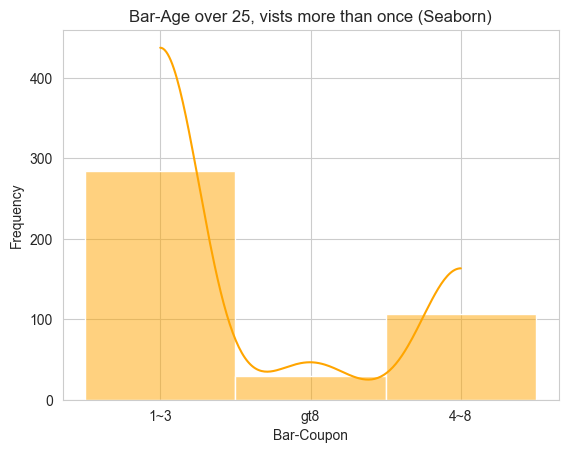

The number of drivers who are over 25 years Age AND visiting the bar more than once is:420


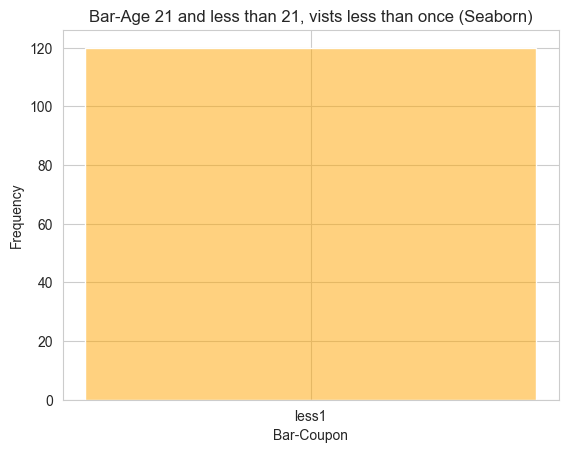

The number of drivers who are over 25 years Age AND visiting the bar more than once is:120
YES, there is a difference. THE NUMBER OF DRIVERS WHO ARE 21 AND OLDER VISIT THE BAR MORE OFTEN, THAN THOSE WHO ARE 21 AND LESS


In [28]:
# Those who go to the bar more than once and are over the age 25
filtered = data_bar[data_bar["age"].isin(["26","31","36","41","46","50plus"])]
filtered_1 = filtered[filtered["Bar"].isin(["1~3", "4~8", "gt8"])]
# print(filtered_1)
sns.histplot(data=filtered_1, x="Bar", bins=5, kde=True, color="orange")
plt.title("Bar-Age over 25, vists more than once (Seaborn)")
plt.xlabel("Bar-Coupon")
plt.ylabel("Frequency")
plt.show()
print("The number of drivers who are over 25 years Age AND visiting the bar more than once is:" + str(284+106+30))
# filtered_1["Bar"].value_counts()

# Those who go to the bar less than once and are under the age 25
filtered_2 = data_bar[data_bar["age"].isin(["21","below21"])]
filtered_3 = filtered_2[filtered_2["Bar"].isin(["less1"])]
# print(filtered_3)
sns.histplot(data=filtered_3, x="Bar", bins=5, kde=True, color="orange")
plt.title("Bar-Age 21 and less than 21, vists less than once (Seaborn)")
plt.xlabel("Bar-Coupon")
plt.ylabel("Frequency")
plt.show()
print("The number of drivers who are over 25 years Age AND visiting the bar more than once is:" + str(120))
# filtered_3["Bar"].value_counts()

print("YES, there is a difference. THE NUMBER OF DRIVERS WHO ARE 21 AND OLDER VISIT THE BAR MORE OFTEN, THAN THOSE WHO ARE 21 AND LESS")


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


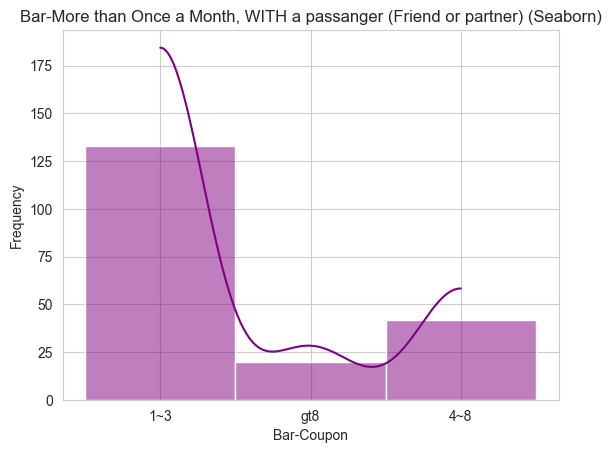

In [29]:
filtered_4 = data_bar[data_bar["Bar"].isin(["1~3", "4~8", "gt8"])]
filtered_5 = filtered_4[filtered_4["passanger"].isin(["Friend(s)","Partner"])]
filtered_6 = filtered_5[~filtered_5["occupation"].isin(["farming", "fishing", "forestry"])]
# print(filtered_6)
sns.histplot(data=filtered_6, x="Bar", bins=5, kde=True, color="purple")
plt.title("Bar-More than Once a Month, WITH a passanger (Friend or partner) (Seaborn)")
plt.xlabel("Bar-Coupon")
plt.ylabel("Frequency")
plt.show()
# print("The number of drivers who are over 25 years Age AND visiting the bar more than once is:" + str(284+106+30))
# filtered_1["Bar"].value_counts()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



     Category                                            details  Count
0  category_1  Bar more than once, Passanger not kid, and not...    195
1  category_2               Bar more than once, under the age 30    345
2  category_3  bar and cheap restaurants more than 4 times, i...    246


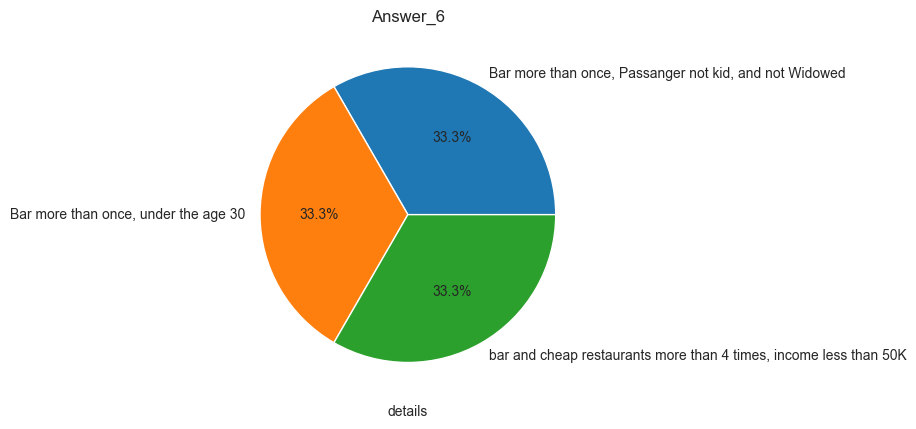

In [30]:
# category_1 = go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
filtered_7 = filtered_5[~filtered_5["maritalStatus"].isin(["Widowed"])]
result_1 = filtered_7["Bar"].value_counts()
# print(result_1)

# category_2 =  to bars more than once a month and are under the age of 30 *OR*
filtered_8 = data_bar[data_bar["Bar"].isin(["1~3", "4~8", "gt8"])]
filtered_9 = filtered_8[filtered_8["age"].isin(["below21", "21", "26"])]
result_2 = filtered_9["Bar"].value_counts()
# print(result_2)

# category_3 = go to cheap restaurants more than 4 times a month and income is less than 50K.
filtered_10 = data_bar[data_bar["RestaurantLessThan20"].isin(["4~8", "gt8"])]
filtered_11 = filtered_10[filtered_10["income"].isin(["$12500 - $24999", "$25000 - $37499", "$37500 - $4999", "Less than $12500"])]
result_3 = filtered_11["income"].value_counts()
# print(result_3)

answer_6 = pd.DataFrame({"Category":["category_1", "category_2", "category_3"], "details": ["Bar more than once, Passanger not kid, and not Widowed", "Bar more than once, under the age 30", "bar and cheap restaurants more than 4 times, income less than 50K"], "Count":[(133+42+20), (209+99+37), (99+74+73)]})
print(answer_6)
counts_4 = answer_6["details"].value_counts()
plt.pie(counts_4, labels=counts_4.index, autopct='%1.1f%%')
plt.title("Answer_6")
plt.xlabel("details")
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

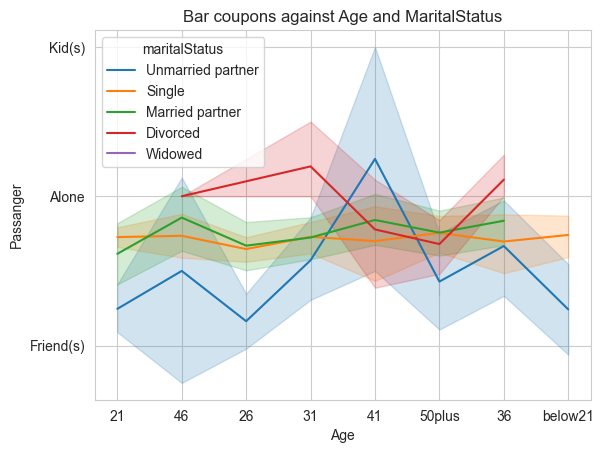

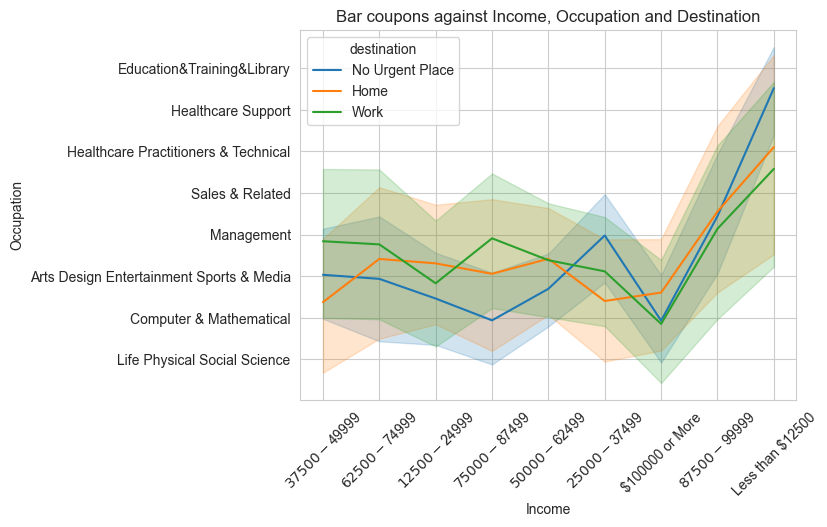

In [43]:
# Using Bar coupons across Age categories
# data_bar
# sns.pairplot(data_bar[['passanger', 'maritalStatus', 'income', 'occupation', 'age']], hue="Category")
sns.lineplot(data = data_bar, x = 'age', y = 'passanger', hue = 'maritalStatus')
plt.title('Bar coupons against Age and MaritalStatus')
plt.xlabel('Age')
plt.ylabel("Passanger")
plt.show()

sns.lineplot(data = data_bar, x = 'income', y = 'occupation', hue = 'destination')
plt.title('Bar coupons against Income, Occupation and Destination')
plt.xlabel('Income')
plt.ylabel("Occupation")
plt.xticks(rotation=45)
plt.show()



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

## Coffee House data analysis

In [38]:
data_coffee = data[data["coupon"] == "Coffee House"]
data_coffee["coupon"].value_counts()
data_coffee["Bar"].value_counts()

Bar
never    1636
less1    1078
1~3       762
4~8       370
gt8       113
Name: count, dtype: int64

In [40]:
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 2 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null   obje

In [41]:
data_coffee["CoffeeHouse"].unique()
data_coffee = data_coffee.replace({pd.NA: "data_not_avbl", None: "data_not_avbl"})
data_bar["CoffeeHouse"].value_counts()

CoffeeHouse
less1            549
1~3              501
never            463
4~8              291
gt8              174
data_not_avbl     39
Name: count, dtype: int64

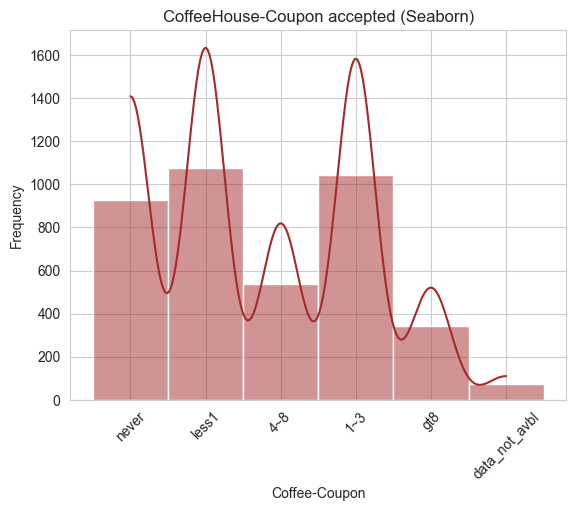

In [35]:
sns.histplot(data=data_coffee, x="CoffeeHouse", bins=5, kde=True, color="brown")
plt.title("CoffeeHouse-Coupon accepted (Seaborn)")
plt.xlabel("Coffee-Coupon")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [44]:
sum = data_coffee["CoffeeHouse"].sum()
Coffee_coupon_acceptance = (549+501+291+174)/(549+501+291+174+ 463+39)
print(Coffee_coupon_acceptance)
print("Coffee Coupon accepted = 75% ")



0.7511155180961825
Coffee Coupon accepted = 75% 


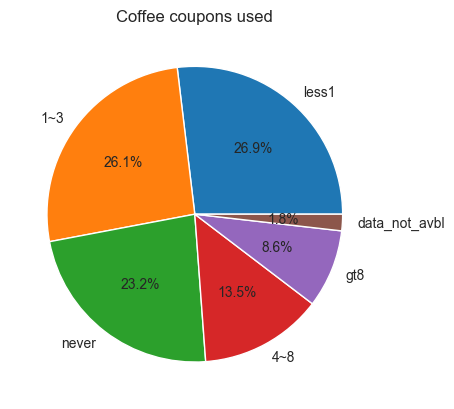

In [45]:
counts_coffee = data_coffee["CoffeeHouse"].value_counts()
plt.pie(counts_coffee, labels=counts_coffee.index, autopct='%1.1f%%')
plt.title("Coffee coupons used")
plt.show()

In [56]:
counts_coffee_occupation = data_coffee['occupation'].value_counts()
top5 = counts_coffee_occupation.head(20)
print(top5)

occupation
Unemployed                                  570
Student                                     499
Computer & Mathematical                     449
Sales & Related                             355
Management                                  298
Education&Training&Library                  296
Arts Design Entertainment Sports & Media    209
Office & Administrative Support             197
Retired                                     164
Business & Financial                        146
Food Preparation & Serving Related           83
Transportation & Material Moving             76
Community & Social Services                  74
Healthcare Practitioners & Technical         74
Legal                                        69
Healthcare Support                           65
Architecture & Engineering                   63
Life Physical Social Science                 61
Protective Service                           58
Personal Care & Service                      50
Name: count, dtype: int64


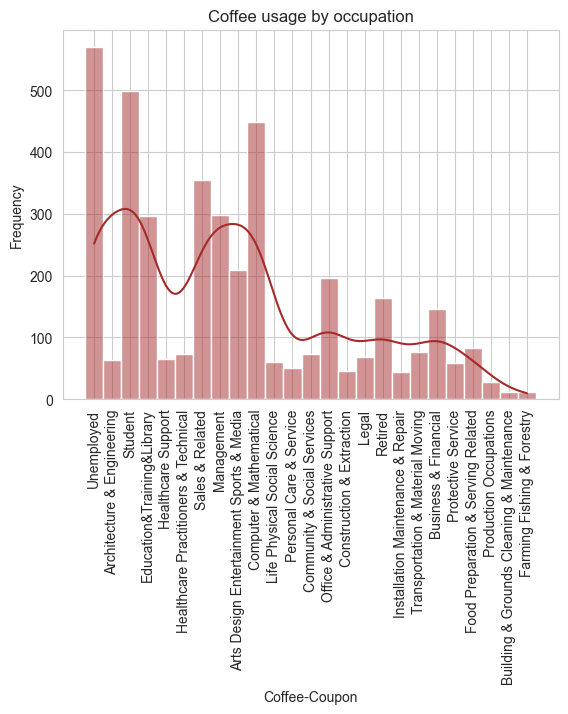

In [60]:
sns.histplot(data=data_coffee, x="occupation", bins=5, kde=True, color="brown")
plt.title("Coffee usage by occupation")
plt.xlabel("Coffee-Coupon")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


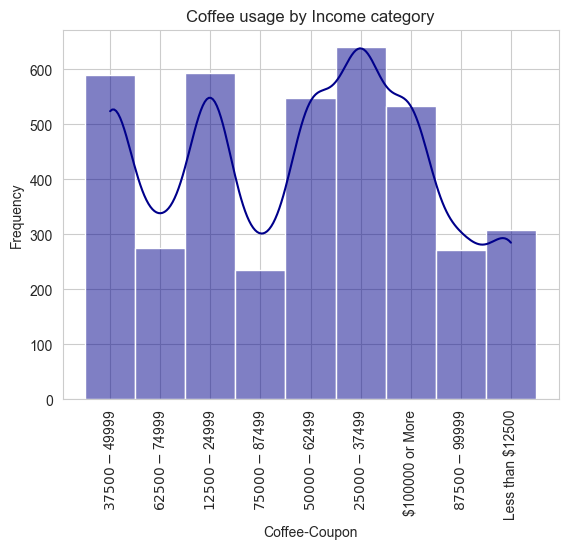

In [64]:
sns.histplot(data=data_coffee, x="income", bins=5, kde=True, color="darkblue")
plt.title("Coffee usage by income")
plt.title("Coffee usage by Income category")
plt.xlabel("Coffee-Coupon")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()